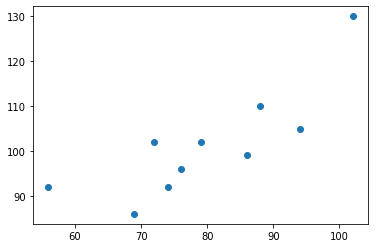

In [149]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

x = np.array([56,72,69,88,102,86,76,79,94,74]) #Area 面积
y = np.array([92,102,86,110,130,99,96,102,105,92]) #price  价格

plt.scatter(x,y)

In [150]:
# 一元线性回归
def f(x,w0,w1):
    y = w0+w1*x
    return y

想要找出最合适的直线（y = w0+w1*x）代表散点的分布，
那么要求出w0 和 w1

构建方程：
可以设dis=一个散点y值到直线距离 （即残差）
dis =  | y_real - (w0+w1*x) |

所有散点到直线的距离，平方一下（避免正负抵消），再求和
将Σ(dis)^2  定义为 残差平方和函数

想要 残差平方和函数（二元函数）取最小值，即求w0和w1偏导
并令两个偏导数等于0，得到w0和w1的表达式

In [151]:
def square_loss(y_real,x,w0,w1):
    return sum(np.square(y_real - (w0+w1*x)))


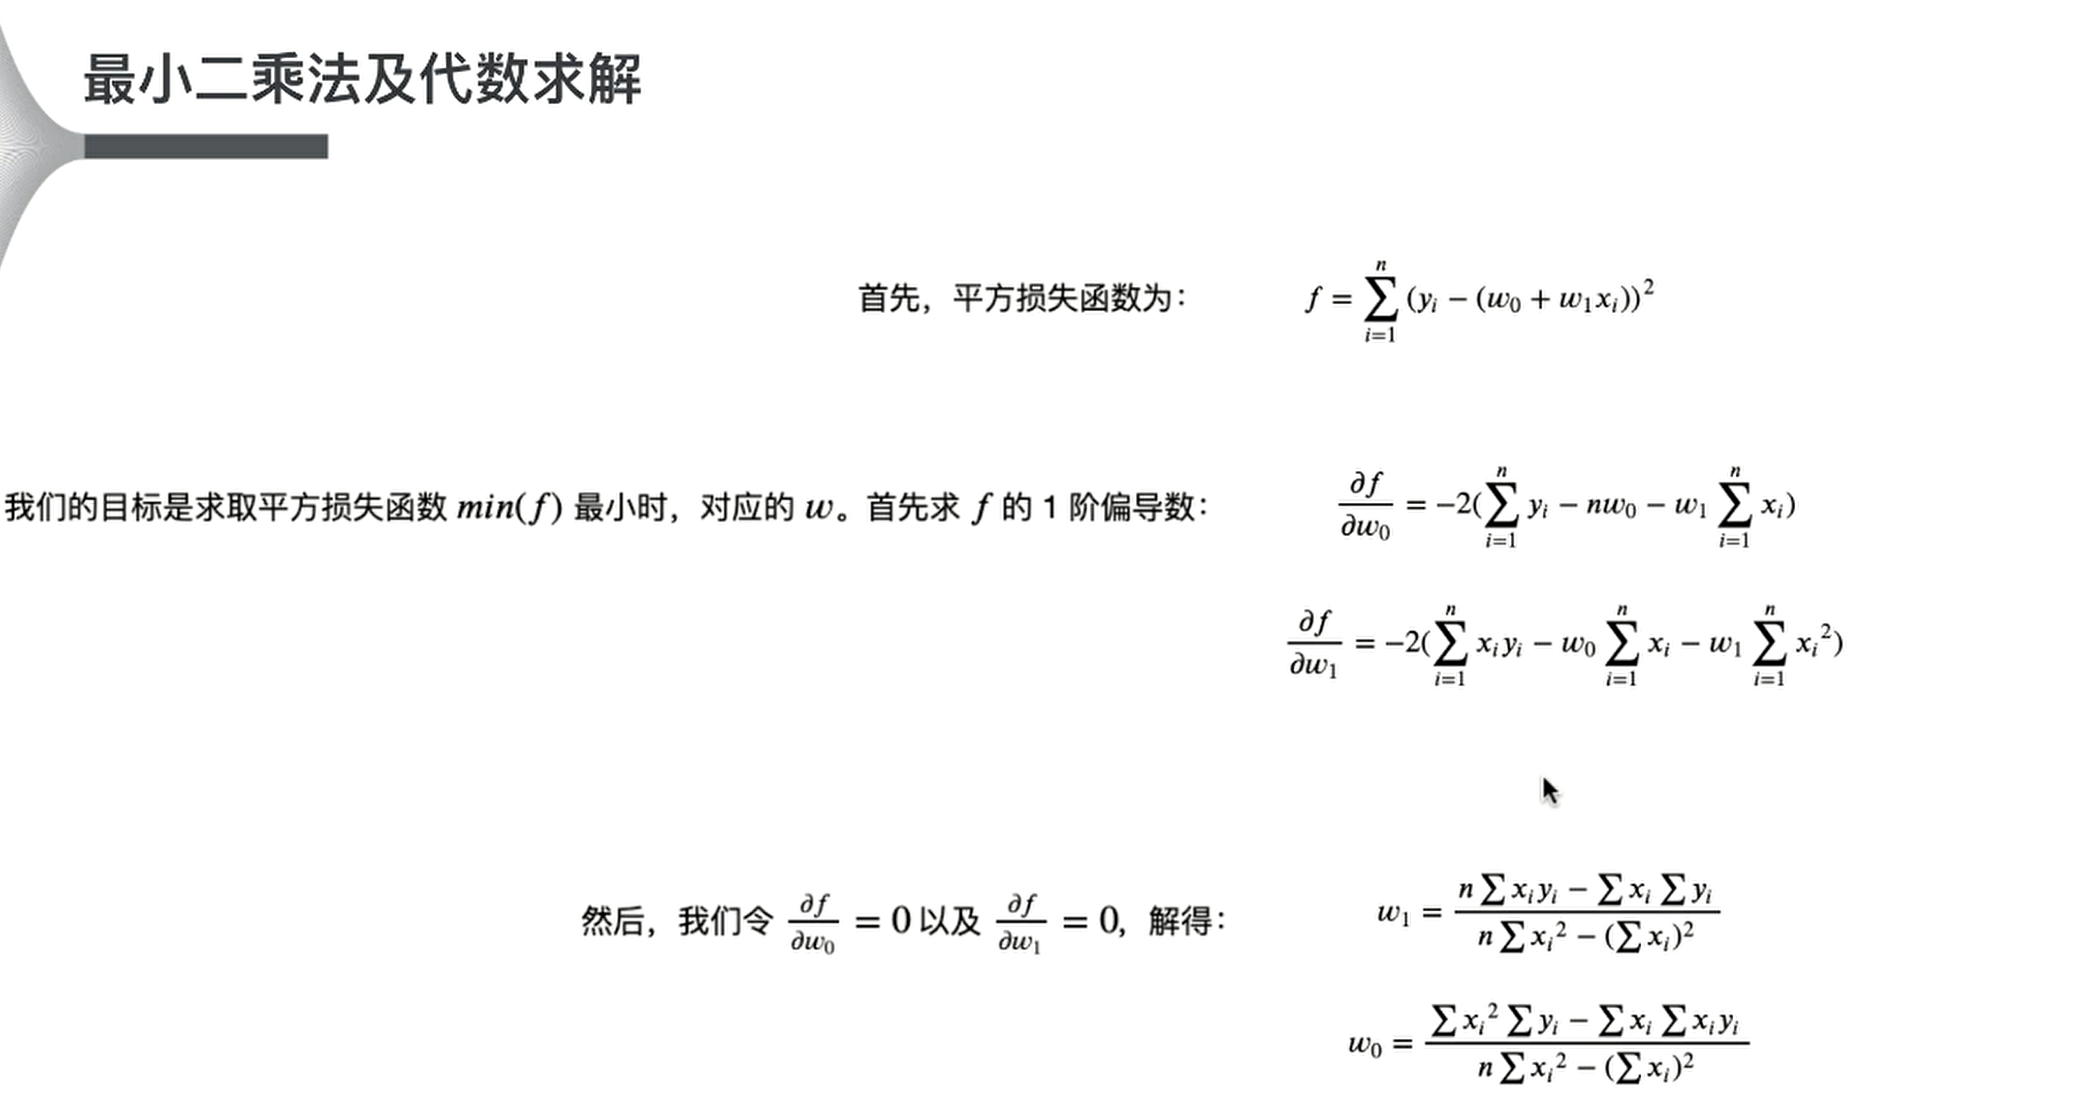

In [152]:
def w_cal(x,y):
    n = len(y)
#     x_sum=0
#     y_sum=0
#     x_square_sum=0
#     xy_sum=0
#     for i in np.arange(0,n):
#         x_sum += x[i]
#         y_sum += y[i]
#         x_square_sum += x[i]*x[i]
#         xy_sum += x[i]*y[i]
#     w0 = (x_square_sum*y_sum-x_sum*y_sum)/(n*x_square_sum-x_sum*x_sum)
#     w1 = (n*xy_sum-x_sum*y_sum)/(n*x_square_sum-x_sum*x_sum)
    w0 = (sum(x*x)*sum(y) - sum(x)*sum(x*y))/(n * sum(x*x) - sum(x)*sum(x))
    w1 = (n*sum(x*y)-sum(x)*sum(y))/(n*sum(x*x) - sum(x)*sum(x))
    return [w0,w1]

In [153]:
w0,w1 = w_cal(x,y)
# 得到w0和w1 就可以绘制出w0和w1
w0,w1

(41.33509168550616, 0.7545842753077117)

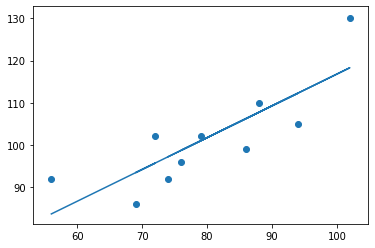

In [154]:
plt.plot(x,f(x,w0,w1))  #画直线
plt.scatter(x,y)

In [155]:
f(150,w0,w1)

154.5227329816629

使用sklearn 工具包

In [156]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
print(x.shape)
x= x.reshape(len(x),1)  #让数组变成（10，1）的矩阵才能作为参数传入
print(x.shape)
LR.fit(x,y)

LR.intercept_,LR.coef_
#截距和系数  也就是w0和w1

(10,)
(10, 1)


(41.33509168550615, array([0.75458428]))

In [157]:
LR.predict(np.array([150]).reshape(1,1))
# 跟自己实现的还有点不同  f(150,w0,w1) = 154.5227329816629

array([154.52273298])

In [158]:
LR.score(x,y)

0.6694539760851641

可以以矩阵的形式来推导
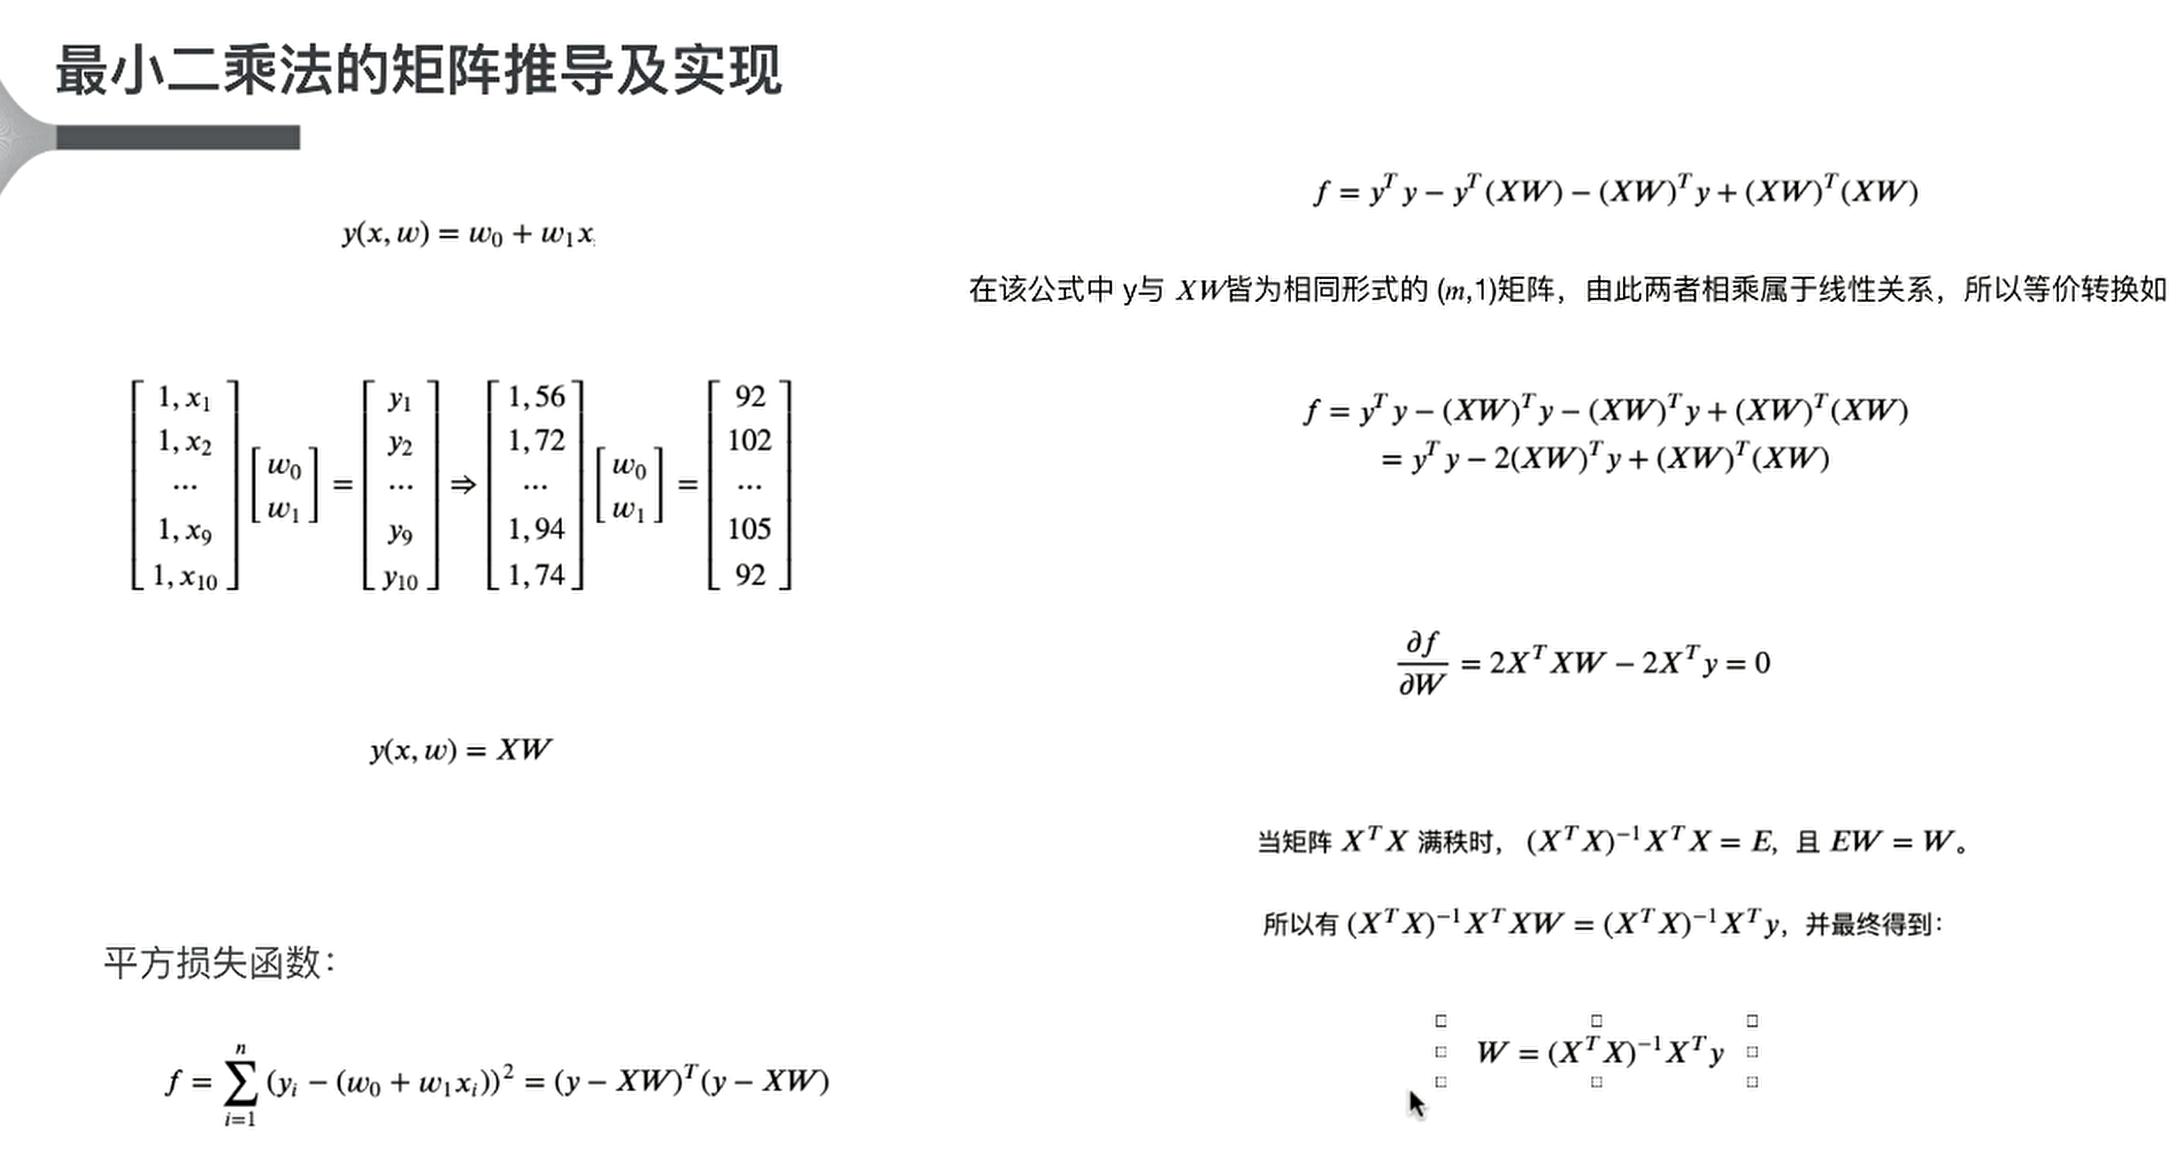

In [159]:
# w值方程
# 当参数很多的时候（w0，w1,w2...），用矩阵效率更高
def w_matrix(x,y):
    w = (x.T*x).I*x.T*y
    return w

# y值方程
def matrix_f(x,w):
    return x*w

In [160]:
# np.matrix 得到矩阵
x = np.matrix([[1,56],[1,72],[1,69],[1,88],[1,102],[1,86],[1,76],[1,79],[1,94],[1,74]]) #Area
y = np.matrix([92,102,86,110,130,99,96,102,105,92]) #price
y = y.T
w = w_matrix(x,y)

# 用于预测x=150的时候
matrix_f(np.array([1,150]).reshape(1,2),w)
#得到结果跟使用LinearRegression一样 sklearn估计是用矩阵乘法实现的

matrix([[154.52273298]])

In [161]:
# boston例子
from sklearn import datasets

boston = datasets.load_boston()


In [162]:
# 构造df
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [163]:
# 查询指定特征名内容
features = df[['CRIM','RM','LSTAT']]
features.describe()

,CRIM,RM,LSTAT
count,506.000000,506.000000,506.000000
mean,3.613524,6.284634,12.653063
std,8.601545,0.702617,7.141062
min,0.006320,3.561000,1.730000
25%,0.082045,5.885500,6.950000
50%,0.256510,6.208500,11.360000
75%,3.677083,6.623500,16.955000
max,88.976200,8.780000,37.970000


In [164]:
target = boston.target

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=0)

In [165]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.6012746900302501

In [166]:
lr.intercept_,lr.coef_
# 截距和参数
# y = -0.13*x1+5.49*x2-0.55*x3-4.529

(-4.529226234886071, array([-0.13340666,  5.49665049, -0.55885281]))

In [167]:
pred = lr.predict(X_test)
pred

array([26.1701115 , 23.08043573, 24.61773121, 10.51512541, 22.8221239 ,
       22.72105149, 20.88451975, 23.07483552, 15.39012664, 24.70569676,
        6.88083743, 18.32866266, 19.54417275,  1.98253922, 37.03800641,
       31.51630886, 23.00182532, 33.23939554, 28.46427223, 22.71434885,
       26.74615069, 20.75938977, 21.25701637, 27.07126742, 20.97398617,
        7.45087523, 20.41569187, 17.74015073, 37.45435677, 19.37594186,
       18.02629067, 19.77344783, 23.99434003, 22.02892663, 25.67300992,
       18.62293658, 10.0774142 , 21.69807632, 19.37244095, 15.01989674,
       24.34276822, 19.34149786, 24.15616041, 14.0888101 , 26.58145874,
       25.65320862, 18.42533736, 20.52127323,  5.68121666, 27.16251599,
       20.42060461, 16.77709425, 21.76396582, 38.84005222, 17.31102103,
       19.04846009, 19.88142011, 20.80113283, 14.64313265, 18.55614865,
       23.44993795, 21.89417117, 31.11902222, 29.32460487, 16.88016525,
       28.9416644 , 21.41663827, 19.06437228, 20.15354913, 21.75

In [169]:
# 绝对误差的平均值 mae
def mae_value(y_true,y_pred):
    n = len(y_true)
    mae = sum(np.abs(y_true-y_pred))/n
    return mae

In [173]:
# 误差平方的期望值 mse
def mse_value(y_true,y_pred):
    n = len(y_true)
    mse = sum(np.square(y_true-y_pred))/n
    return mse

In [180]:
mae = mae_value(y_test,pred)
mse = mse_value(y_test,pred)

In [182]:
mae,mse

(3.9389406625132337, 33.20006295308442)

Summary:
    1.一元线性回归的推导(最小二乘法 和 矩阵推导)
    2.sklearn 使用线性回归模型
    3.绝对误差的平均值,误差平方的期望值